In [1]:
import Diagrams.Prelude
import Diagrams.TwoD.Size (mkSizeSpec2D)
import Diagrams.Backend.SVG (renderSVG)

In [2]:
:set -XTypeFamilies -XFlexibleContexts -XNoMonomorphismRestriction

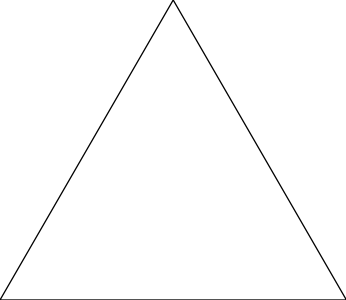

In [3]:
diagram $ scaleUToX 10 $ eqTriangle 5

In [4]:
sinTriangle a b c = scaleUToX a $ mconcat ((\x -> eqTriangle (abs $ a * sin (x*b))) <$> [1..c])

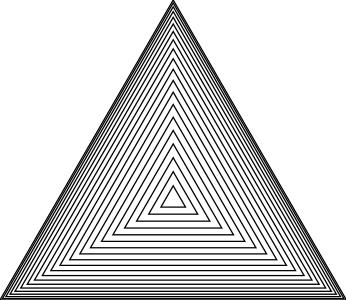

In [5]:
diagram $ sinTriangle 20 0.07 20

In [6]:
-- ts = map (\i -> sinTriangle 20 0.07 20) [3..15]

In [7]:
myTriangle = sinTriangle 20 0.07 20 # lc darkblue # lw thin

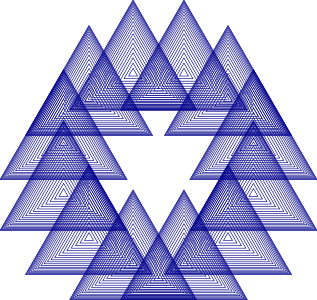

In [8]:
diagram $ atPoints (trailVertices $ regPoly 12 8) (repeat myTriangle)

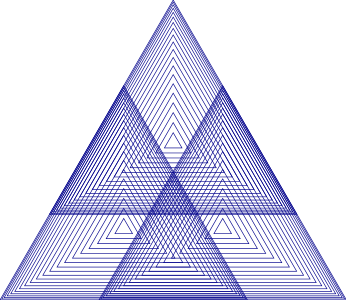

In [9]:
combined = atPoints (trailVertices $ regPoly 3 8) (repeat myTriangle)
diagram combined

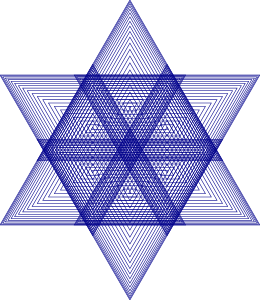

In [10]:
diagram $ combined `atop` (combined # rotateBy 0.5)

In [11]:
combineN n = mconcat $ map (\i -> combined # rotateBy (1/n*i)) [0..n-1]

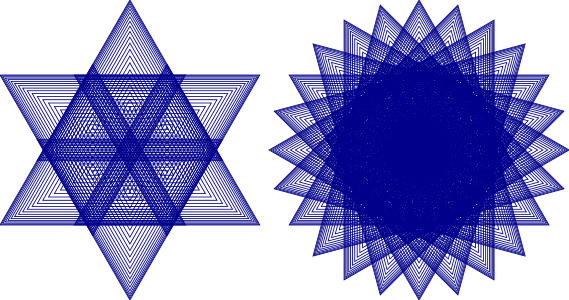

In [12]:
diagram $ hsep 1 [combineN 2, combineN 8]

In [13]:
dimensions = mkSizeSpec2D (Just 800) (Just 800) -- this works nice on A4
renderSVG "./combined.svg" dimensions combined
renderSVG "./combined2.svg" dimensions (combineN 2)
renderSVG "./combined8.svg" dimensions (combineN 8)
renderSVG "./poly12.svg" dimensions (atPoints (trailVertices $ regPoly 12 8) (repeat myTriangle))

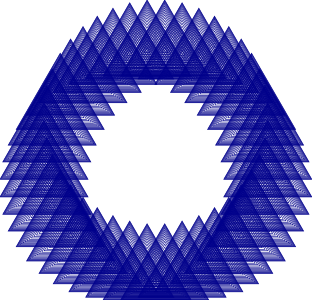

In [16]:
many = atPoints (trailVertices $ regPoly 40 4) (repeat myTriangle)
renderSVG "./many.svg" dimensions many
diagram many